In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras import models
import keras

In [3]:
from keras.datasets import mnist

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train = X_train.reshape(-1,28,28,1)

In [7]:
X_test= X_test.reshape(10000,28,28,1)

In [8]:
X_train = X_train.astype('float32')

In [9]:
X_test=X_test.astype('float32')

In [10]:
X_train/=255
X_test /=255

In [11]:
n_class = 10

In [12]:
from keras.utils import np_utils
n_classes = 10
print("shape before one-hot encoding: ",y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_classes)
Y_test = np_utils.to_categorical(y_test,n_classes)
print("shape after one-hot encoding: ",Y_train.shape)

shape before one-hot encoding:  (60000,)
shape after one-hot encoding:  (60000, 10)


In [13]:
sample_shape = (28,28,1)

In [14]:
k1_number = 32
k1_shape = (3,3)
p1_shape=(2,2)

In [15]:
k2_number = 64
k2_shape = (3,3)
p2_shape=(2,2)

In [16]:
k3_number = 128
k3_shape = (3,3)
p3_shape=(2,2)

In [17]:
model = models.Sequential()

In [18]:
model.add(layers.Conv2D(k1_number,kernel_size=k1_shape,
                       strides=(1,1),padding='same',
                       activation = 'relu', input_shape = sample_shape))

In [19]:
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=p1_shape,strides=(2,2)))

In [20]:
model.add(layers.Conv2D(k2_number,kernel_size=k2_shape,
                       strides=(1,1),padding='same',
                       activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=p2_shape,strides=(2,2)))
model.add(layers.Conv2D(k3_number,kernel_size=k3_shape,
                       strides=(1,1),padding='same',
                       activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=p3_shape,strides=(2,2)))

In [21]:
model.add(layers.Flatten())

In [22]:
model.add(layers.Dense(100,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(n_class,activation='softmax'))

In [23]:
from tensorflow import keras


optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'categorical_crossentropy',optimizer = optimizer,
             metrics = ['accuracy'])

In [24]:
pd.DataFrame(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                        

""


In [25]:
result = model.fit(X_train,Y_train,epochs = 10,batch_size=64,
                  validation_data = (X_test,Y_test))

Epoch 1/10
938/938 [==============================] - 67s 71ms/step - loss: 0.0861 - accuracy: 0.9739 - val_loss: 0.0496 - val_accuracy: 0.9843
Epoch 2/10
938/938 [==============================] - 65s 70ms/step - loss: 0.0346 - accuracy: 0.9896 - val_loss: 0.0332 - val_accuracy: 0.9890
Epoch 3/10
938/938 [==============================] - 65s 69ms/step - loss: 0.0251 - accuracy: 0.9917 - val_loss: 0.0352 - val_accuracy: 0.9893
Epoch 4/10
938/938 [==============================] - 66s 70ms/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0285 - val_accuracy: 0.9904
Epoch 5/10
938/938 [==============================] - 66s 70ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0406 - val_accuracy: 0.9885
Epoch 6/10
938/938 [==============================] - 67s 71ms/step - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0274 - val_accuracy: 0.9910
Epoch 7/10
938/938 [==============================] - 66s 70ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0355 - val_accuracy:

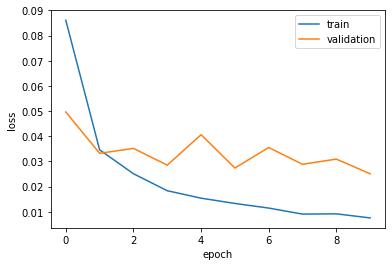

In [26]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='upper right')

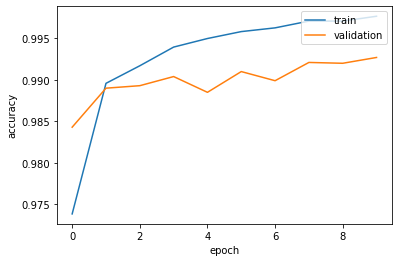

In [27]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper right')